# Components of an Image Classification Neural Network Model



| ID| Hyperparameter | Binary Classification |
| -------| -----------    | -----------           |
|1| Input Layer Shape       | Same as number of features           | Same as binary|
|2| Hidden Layer(s)         | Problem Specific, min=1, max=inf.    |Same as binary|
|3| Neurons per Hidden Layer| Problem Specific, generally 10-100   |Same as binary|
|4| Output Layer Shape      | 1 (one class or the other) | 1 per class
|5| Hidden Activation       | Usually ReLU | Same as binary  |
|6| Output Activation | Sigmoid | Softmax |
|7| Loss Function | Cross Entropy | Same as binary |
|8| Optimizer |SGD or Adam| Same as binary |

```
Note: 'Adam' is "safe". Good for initial training because it is more forgiving on the chosen hyperparameters. For production SGD tends to perform better, and also generalizes better.
```

## 1. Create Model
model = tf.keras.sequential([  
  &emsp; tf.keras.Input(shape=(224,224,3)), &emsp; # This is (ID:1)  
  &emsp; tf.keras.layers.Dense(100, activation="relu"), &emsp; # (100=ID:3; ID:5)  
  &emsp; tf.keras.layers.Dense(3, activation="softmax"), &emsp; # (3=ID:4; ID:6)  
  ])

## 2. Compile the Model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), &emsp; # (ID:7)  
&emsp; optimizer=tf.keras.optimizers.Adam(), &emsp; # (ID:8)  
&emsp; metrics=["accuracy"])

## 3. Fit the Model
model.fit(X_train, y_train, epochs=5)

## 4. Evaluate the Model
model.evaluate(X_test, y_test)

Some types of classification
* Binary
* Multiclass
* Multilabel

**AMAZING** resource: https://playground.tensorflow.org/

## Creating Data to View and Fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Review features and labels
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [3]:
# Visualize
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles



,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


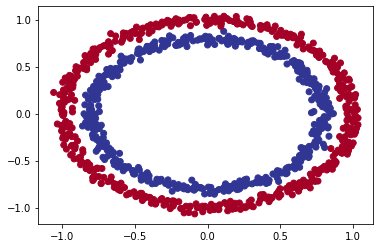

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and Output Shapes

In [5]:
# View shapes of Features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# Sample count
len(X), len(y)

(1000, 1000)

In [7]:
# View first example of Features and labels
X[0],y[0]


(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [8]:
# Import dependencies
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [9]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 1. Create Model
model_1 = tf.keras.Sequential([   
                             tf.keras.layers.Dense(1), 
                             ])

# 2. Compile the Model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=["accuracy"])

# 3. Fit the Model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

In [11]:
# 4. Evaluate the Model
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 1s 7ms/step - loss: 5.4155 - accuracy: 0.5100


[5.4154510498046875, 0.5099999904632568]

Note: this is performing pretty much as guessing...

Let's add another layer

In [12]:
# 1. Create Model
model_2 = tf.keras.Sequential([   
                             tf.keras.layers.Dense(1), 
                             ])

# 2. Compile the Model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=["accuracy"])

# 3. Fit the Model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the Model
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 4.5724 - accuracy: 0.4900


[4.572386264801025, 0.49000000953674316]

Pretty much the same performance...

In [14]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our Model

Hint: Get ideas from the [TensorFlow Playground](https://playground.tensorflow.org/)

1. Create a model: can add more layers or increase the count of hidden units within a layer
2. Compiling a model: can choose different optimization functions (i.e. Adam vs SGD)
3. Fitting a model: can fit for more epochs 

### How to we visualize what is going on so that we can intelligently improve?

(array([101., 151.,  96.,  75.,  79.,  74.,  85.,  90., 148., 101.]),
 array([-1.1489823 , -0.9378489 , -0.7267156 , -0.5155823 , -0.30444896,
        -0.09331563,  0.1178177 ,  0.32895103,  0.54008436,  0.7512177 ,
         0.962351  ], dtype=float32),
 <a list of 10 Patch objects>)

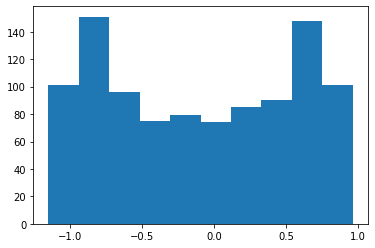

In [15]:
predictions = model_2.predict(X)
plt.hist(predictions)

Create function `plot_decision_boundary` to:
* Take in trained model; Features (X), labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls_

In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """ 
  Plots the decvision boundary created by a model predicting X

    This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define axis boundaries of the plot and create a meshgrid
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classifcation...


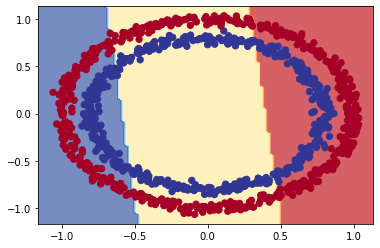

In [17]:
# View the prediction plot
plot_decision_boundary(model=model_2,
                       X=X,
                       y=y)

In [18]:
# 1. Create Model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Input(shape=(None,32, 2)),
                               tf.keras.layers.Dense(2),
                             ])

# 2. Compile the Model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=["accuracy"])

# 3. Fit the Model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [19]:
# 4. Evaluate the Model
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 2.0933 - accuracy: 0.5500


[2.0933454036712646, 0.550000011920929]

## Non-Linearity

Obviously non-linearity is the issue here. Going to play with a few things that won't work first.

In [20]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the Model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)

])

# 2. Compile the Model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the Model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

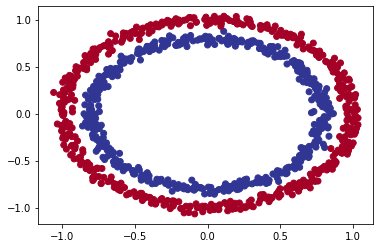

In [21]:
 # Check our data
 plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

doing binary classifcation...


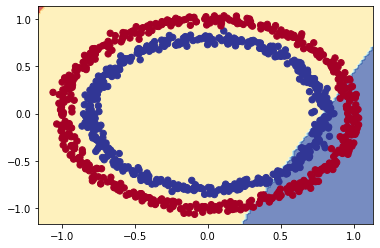

In [22]:
# Check the decision boundary
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Building with non-linear activation function.

In [23]:
# Set Random Seet
tf.random.set_seed(42)

# 1. Create Model (nonlinear)
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the Model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the Model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

doing binary classifcation...


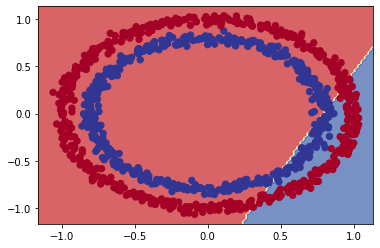

In [24]:
# Check the decision boundary
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Only changing the activation function is not enough to get a good non-linear learning result


In [25]:
# 2 layers, 4 neurons each approach. Increase epochs to align with playground

# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1)
])

# 2. Compile model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_6.fit(X, y, epochs=250, verbose=0)

In [26]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Wow still really poor performance. Why? Visualize!

doing binary classifcation...


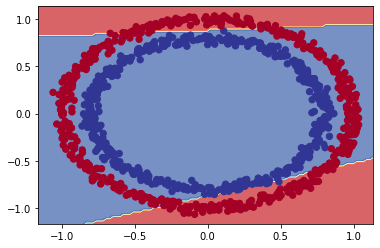

In [27]:
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

Alright, actually implement the missing piece. We did not update the activation in the output layer

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=250, verbose=0)

In [29]:
# Evalute
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593363776803017, 0.9919999837875366]

doing binary classifcation...


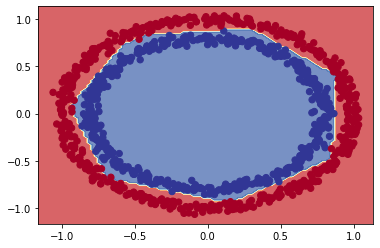

In [30]:
# Visualize
plot_decision_boundary(model=model_7, 
                       X=X, 
                       y=y)

Problem with the above is trained and evaluated on the same data

In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_7.fit(X_train, y_train, epochs=250, verbose=0)

In [32]:
# Evalute
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9750


[0.15566521883010864, 0.9750000238418579]

doing binary classifcation...


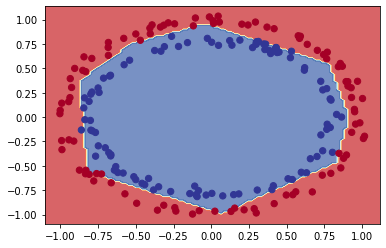

In [33]:
# Visualize
plot_decision_boundary(model=model_7, 
                       X=X_test, 
                       y=y_test)

Above is using the test set. 1st image is using the training set.

### We have seen the combinmation of linear and non-linear functions in Neural Networks.

Let's see them inaction! (VISUALIZE, VISUALIZE, VISUALIZE) 

In [34]:
# Create a 'toy' tensor.
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

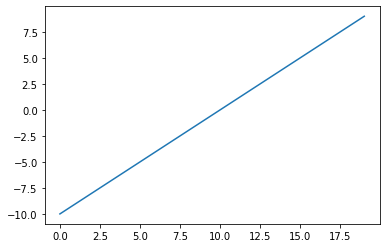

In [35]:
plt.plot(A)

In [36]:
# replicate sigmoid function: sigmoid(z) = 1/1+e**-z

def sigmoid(z):
  return 1 / (1 + tf.exp(-z))

# Use sigmoid on toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

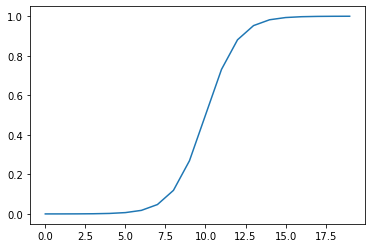

In [37]:
# Plot it
plt.plot(sigmoid(A))

Note: also brings values between 0 and 1... a type of normalization?

In [38]:
# Replicate ReLU function: max(x, 0)

def relu(x):
  return tf.maximum(x, 0)

# Use ReLU on toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

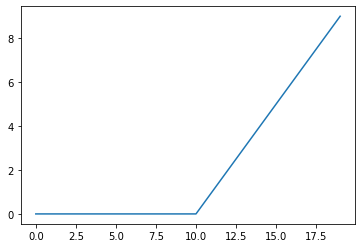

In [39]:
plt.plot(relu(A))

## Evaluating and Improving our Predictions

doing binary classifcation...
doing binary classifcation...


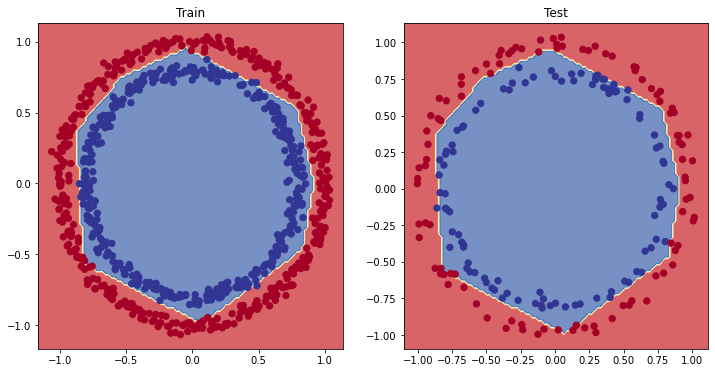

In [40]:
# Show our training vs test set classifiers

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7, X=X_test, y=y_test)
plt.show()

## PLot the loss (training) curves

The 'fit' function of tf.keras.model allows us to gain insight into training performance over time (epochs). It returns a **History** object.

History.history:
A record of training loss values and at successive epochs as well as validation loss values and validation metrics (if applicable)

In [41]:
history.history

{'accuracy': [0.5019999742507935,
  0.5170000195503235,
  0.515999972820282,
  0.5299999713897705,
  0.5389999747276306,
  0.5379999876022339,
  0.550000011920929,
  0.5479999780654907,
  0.5529999732971191,
  0.5509999990463257,
  0.550000011920929,
  0.5550000071525574,
  0.5559999942779541,
  0.5540000200271606,
  0.5580000281333923,
  0.5550000071525574,
  0.5550000071525574,
  0.5550000071525574,
  0.5590000152587891,
  0.5600000023841858,
  0.5640000104904175,
  0.5600000023841858,
  0.5699999928474426,
  0.5569999814033508,
  0.5669999718666077,
  0.574999988079071,
  0.5809999704360962,
  0.5699999928474426,
  0.5699999928474426,
  0.5789999961853027,
  0.5759999752044678,
  0.5759999752044678,
  0.5759999752044678,
  0.5759999752044678,
  0.5789999961853027,
  0.578000009059906,
  0.578000009059906,
  0.5789999961853027,
  0.5789999961853027,
  0.5759999752044678,
  0.578000009059906,
  0.574999988079071,
  0.578000009059906,
  0.5809999704360962,
  0.5809999704360962,
  0.583

In [42]:
# Conver the historyu object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.689120,0.502
1,0.684836,0.517
2,0.682429,0.516
3,0.681333,0.530
4,0.680156,0.539
...,...,...
245,0.048275,0.993
246,0.047893,0.995
247,0.047540,0.993
248,0.047134,0.995


Text(0.5, 1.0, 'model_7 loss curves')

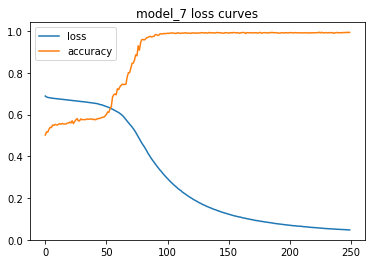

In [43]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_7 loss curves")

For many problems, the loss function going down means the model is improving (predictions getting closer to ground-truth).

Why does accuracy seem to max out before loss finishes decreasing? Could this be the function improving the 'distance' from the ground truth?

## Finding the best learning rate

To do so we will utilize the learning rate **callback** - this is additional information that can be returned during the training step


In [44]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_7) (called model_9 to align with course I am following along with)
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['mse','accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6917 - mse: 0.2495 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - mse: 0.2491 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - mse: 0.2488 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - mse: 0.2484 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - mse: 0.2480 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - mse: 0.2477 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - mse: 0.2473 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - mse: 0.2

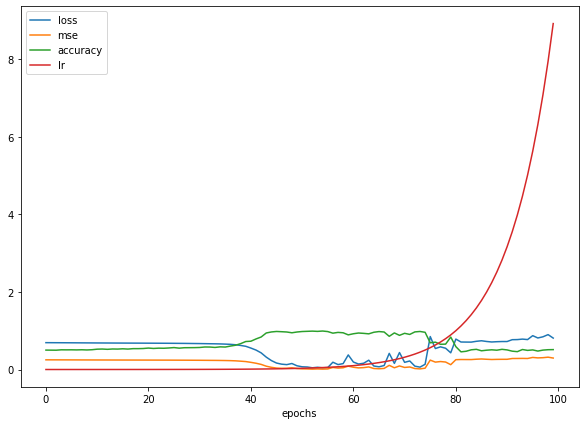

In [45]:
# Check the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate versus Loss')

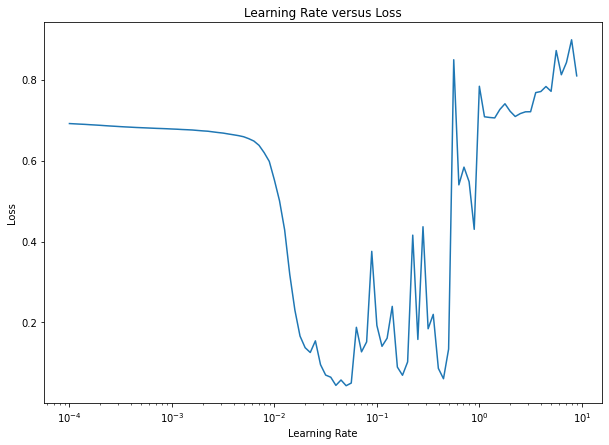

In [46]:
# Plot the learning rate v.s. the loss
lrs =  1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate versus Loss")

Rule of thumb is to take the learning rate value where the loss is decreasing, but not quite flattened out. Usually about 10x smaller than bottom of the curve.

So 10x-2 ish.. usually 10x less than minimum point. 

**What about adaptive, or annealing learning rates? Doesn't the ideal learning rate change over time? Generally starting larger and decreasing?**

In [47]:
# Example of other typical learnign rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

Previously we set lr=0.01, but from the above information, it makes sense to use 0.02. How does this impact our performance?

In [48]:
# Set random seed
tf.random.set_seed(42)

# Create Model
model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile Model
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=['accuracy'])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9538
Epoch 11/100
25/25 [=

In [49]:
model_9.evaluate(X_test, y_test)
print('\n')
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.9561 - mse: 0.3522 - accuracy: 0.5000


7/7 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9750


[0.07063151150941849, 0.9750000238418579]

We see improvement between the two models!

doing binary classifcation...
doing binary classifcation...


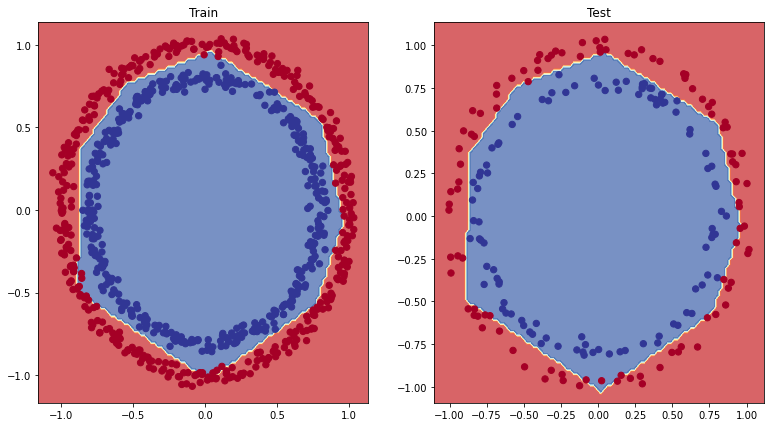

In [50]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

Classification Evaluation Metrics

We have been using accuracy, but remember from class? Not always the best, especially for imbalanced classes

* Accuracy - (tp+tn)/(tp+tn+fp+fn) - Default metric. Not good for imbalanced classes
* Precision - tp/(tp+tp) - Leads to less false positives
* Recall - tp/(tp+fn) - Leads to less false negatives
* F1 Score - 2 * (precision*recall/precision+recall) - Combination of recall and precision. Good overall metric
* Confusion Matrix - Hard to use  for large number of classes, but helps comparing predictions to ground truth where the model gets 'confused'

In [51]:
# See how our model performs

loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9750
Model loss on the test set: 0.07063151150941849
Model accuracy on test set: 97.50%


In [52]:
from sklearn.metrics import confusion_matrix

# Create predictions
y_preds = model_10.predict(X_test) # note this returns a probability, rather than binary 1,0. Need to round.
y_preds = np.around(y_preds)
# Create confusion matrix
cm = confusion_matrix(y_test,y_preds)

print(cm)
print('\n')
print(f'cm[0] = {cm[0]}')
print(f'cm[1] = {cm[1]}')
print(f'cm.sum(axis=0) = {cm.sum(axis=0)} # this adds up the columns')
print(f'cm.sum(axis=1) = {cm.sum(axis=1)} # this adds up the rows')
print('\n')
print(f'cm.sum(axis=1)[:,np.newaxis] = \n {cm.sum(axis=1)[:,np.newaxis]} \n # this takes the above array and turns each element into its own row')


[[ 95   5]
 [  0 100]]


cm[0] = [95  5]
cm[1] = [  0 100]
cm.sum(axis=0) = [ 95 105] # this adds up the columns
cm.sum(axis=1) = [100 100] # this adds up the rows


cm.sum(axis=1)[:,np.newaxis] = 
 [[100]
 [100]] 
 # this takes the above array and turns each element into its own row


**Beautify** `me` *captain*

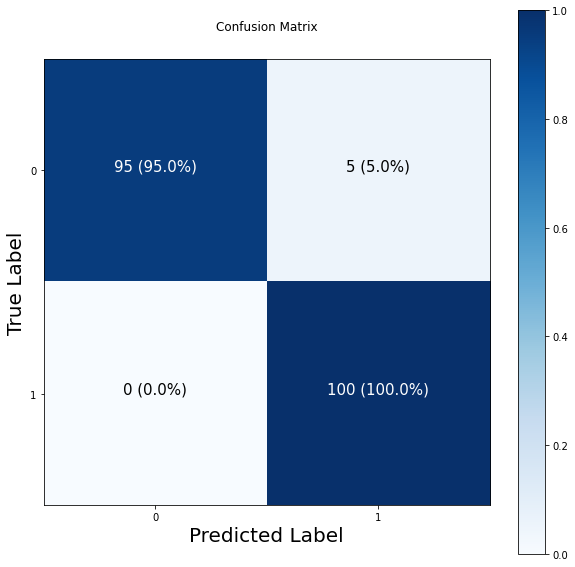

In [53]:
# Note the confdusion matrix code below is a remix of scikit-learn's plot_confusion_matrix but for TensorFlow

import itertools

# Create the confusion matrix
cm = confusion_matrix(y_test,y_preds)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] # normalize the cm
n_classes = cm.shape[0]

# Beautifying
fig, ax = plt.subplots(figsize = (10,10))
cax = ax.matshow(cm_norm, cmap=plt.cm.Blues) #plt.cm ==> colormap, not confusion matrix
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size 
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
# Set thresholds to different colors
threshold = (cm.max() + cm.min()) / 2

# Plot text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment='center',
           color='white' if cm[i,j] > threshold else 'black',
           size=15)


# Working with a larger, multiclass, example. 

Classifying clothing using fashion_mnist dataset:


*Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.*
[
https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)

In [54]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into test and training sets.
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [55]:
# See some of the data
print(f'Training Sample:\n{train_data[0]}\n')
print(f'Training Label:\n{train_labels[0]}\n')

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [56]:
# Shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

(<matplotlib.image.AxesImage at 0x7f0cf3b3d610>, 5)

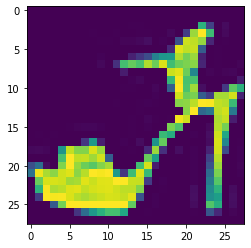

In [57]:
import matplotlib.pyplot as plt
plt.imshow(train_data[9]), train_labels[9]

In [58]:
# Human-readable labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal','Shirt','Sneaker','Bag','Heals']

len(class_names)

10

Text(0.5, 1.0, 'T-shirt')

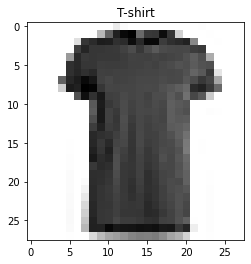

In [59]:
# Plot image and label
data_index = 17
plt.imshow(train_data[data_index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[data_index]])

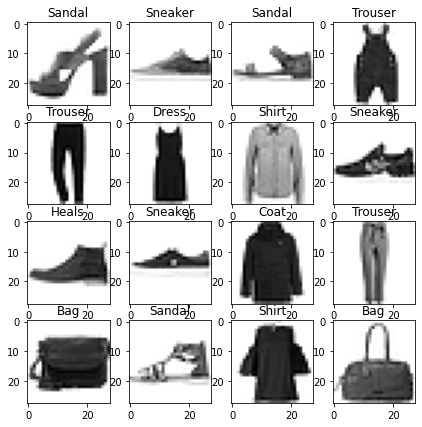

In [60]:
# Plotting a bunch of random examples to better understand the data (a little repetitive considering the data site has images of this already)
import random
plt.figure(figsize=(7,7))
for i in range(16):
  ax = plt.subplot(4,4,i+1) # row, column, index
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  # plt.axis(False)


## Building the multi-class model!

* Input shape = 28x28 (shape of one image)
* Output shape = 10 (# classes of clothing)
* Loss function = tf.keras.losses.CategoprialCrossentropy()
* Output layer activation = Softmax

In [61]:
# Check dimensions 
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [62]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
mcm_1 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)), # takes 2D grid (image values) and changes to 1D array
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

# Compile Model
mcm_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
non_norm_history_mcm_1 = mcm_1.fit(train_data, 
                                   train_labels, 
                                   epochs=10,
                                   validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [63]:
mcm_1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 4)                 3140      
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


We are perfominmg better than guessing by 3x. but one thing is that we have not normalized the data at all.

In [64]:
# View training data range
train_data.min(), train_data.max()

(0, 255)

In [65]:
# Perform normalization
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Confirm new values
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

change nothing in model and see how/if performance improves with normalization

In [72]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
mcm_2 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)), # takes 2D grid (image values) and changes to 1D array
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

# Compile Model
mcm_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Sparse because not 1-hot
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
norm_history_mcm_2 = mcm_2.fit(train_data_norm, 
                                   train_labels, 
                                   epochs=10,
                                   validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

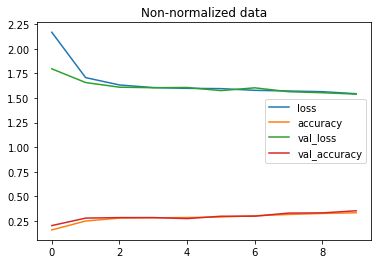

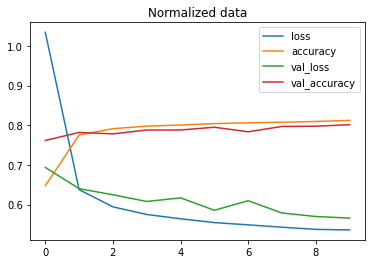

In [73]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history_mcm_1.history).plot(title="Non-normalized data")
#Plot normalized data loss curves
pd.DataFrame(norm_history_mcm_2.history).plot(title="Normalized data")


Will you look at that! Significantly higher accuracy and lower loss, just by normalizing!


When comparing models it's important that they are being compared on the same criteria. Change one thing at a time to better understand where the performance improvement is coming from.

## Finding ideal learning rate

In [74]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

# Compile Model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

# Create the learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-2 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0987 - accuracy: 0.5718 - val_loss: 0.9617 - val_accuracy: 0.6553 - lr: 0.0100
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8748 - accuracy: 0.6901 - val_loss: 0.8590 - val_accuracy: 0.7021 - lr: 0.0112
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8531 - accuracy: 0.6939 - val_loss: 0.8439 - val_accuracy: 0.6905 - lr: 0.0126
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8503 - accuracy: 0.6957 - val_loss: 0.8403 - val_accuracy: 0.6997 - lr: 0.0141
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8519 - accuracy: 0.6938 - val_loss: 0.9952 - val_accuracy: 0.6495 - lr: 0.0158
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8506 - accuracy: 0.6960 - val_loss: 0.8441 - val_accuracy: 0.7067 - lr: 0.0178
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'plotting learning rate effectiveness')

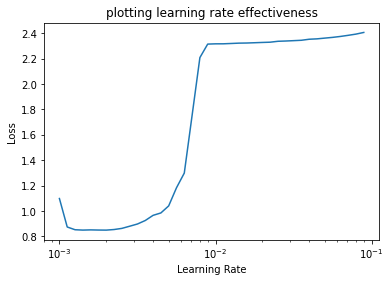

In [80]:
# Plot the learning rate decy curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**((tf.range(40)/20)))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("plotting learning rate effectiveness")

10e-3 is 0.001 which is the default value for Adam, which we used.

In [83]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

# Compile Model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

# Fit the model
model_14_history = model_14.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels)
                               )

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classificaiton model we could:
* Evaluate its performance using other classification metrics (i.e. confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training for longer or changing architecture)
* Save the model to use later/elsewhere (not really evaluating with this though...)

In [99]:
# Create a confusion matrix function (pulled from above cell mainly)

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize the confusion matrix
  n_classes = cm.shape[0]

  # Beautify
  fig, ax = plt.subplots(figsize=figsize) # Create matrix plot)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title='Confusion Matrix',
         xlabel='Predicted Label',
         ylabel='True Label',
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min() / 2.0)

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j ]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=text_size) 

In [82]:
class_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Heals']

In [85]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

array([[1.78801834e-10, 8.59335103e-11, 1.46917664e-05, 5.13161808e-07,
        1.81152336e-05, 2.97060341e-01, 4.20026289e-08, 4.38645892e-02,
        4.03015967e-03, 6.55011594e-01],
       [1.65367328e-05, 3.77228664e-16, 9.07316446e-01, 7.29073406e-07,
        2.47242767e-02, 4.15087470e-17, 6.74995705e-02, 0.00000000e+00,
        4.42385790e-04, 1.77472556e-15],
       [4.33511450e-05, 9.98505235e-01, 1.06210706e-07, 1.42850075e-03,
        1.54846366e-05, 6.91499768e-22, 7.37811524e-06, 1.22946607e-16,
        5.29575495e-08, 6.05440481e-12],
       [4.30087748e-05, 9.96566236e-01, 7.15737315e-07, 3.24998843e-03,
        1.19078315e-04, 2.16415290e-19, 2.04281223e-05, 5.03702372e-14,
        6.17275475e-07, 1.14019505e-09],
       [1.47298977e-01, 2.39545761e-06, 1.33107737e-01, 1.01817297e-02,
        3.32404375e-02, 4.55808943e-18, 6.75670624e-01, 2.75189509e-29,
        4.98094480e-04, 1.62312739e-14]], dtype=float32)

In [87]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.7880183e-10, 8.5933510e-11, 1.4691766e-05, 5.1316181e-07,
        1.8115234e-05, 2.9706034e-01, 4.2002629e-08, 4.3864589e-02,
        4.0301597e-03, 6.5501159e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Heals')

In [88]:
# Convert all prediction probnabilities into integers
y_preds = y_probs.argmax(axis=1)

# View first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [89]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[833,  13,  11,  54,   3,   2,  73,   0,  11,   0],
       [  6, 950,   1,  26,   5,   1,  11,   0,   0,   0],
       [ 42,   1, 593,   8, 164,   1, 178,   0,  13,   0],
       [ 74,  27,  10, 787,  35,   1,  56,   2,   8,   0],
       [  2,   1,  83,  29, 728,   0, 150,   0,   7,   0],
       [  0,   1,   0,   0,   0, 941,   0,  34,   3,  21],
       [217,   9, 117,  34,  98,   3, 505,   0,  17,   0],
       [  0,   0,   0,   0,   0,  70,   0, 905,   0,  25],
       [ 16,   1,  32,  19,   5,   9,   8,   5, 905,   0],
       [  0,   0,   0,   0,   1,  36,   0,  48,   5, 910]])

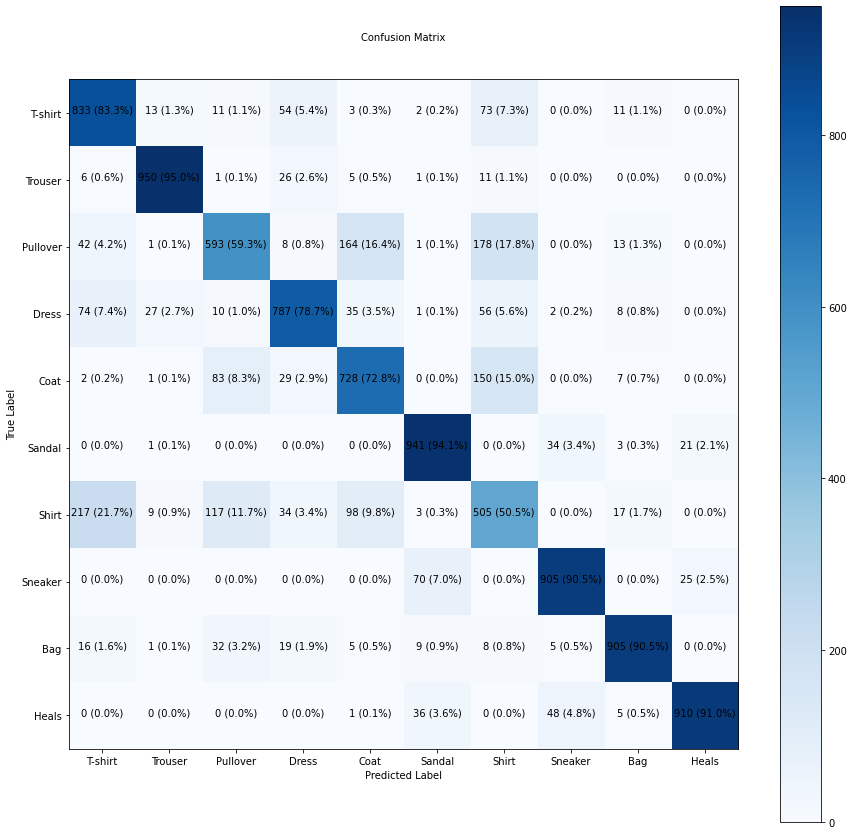

In [100]:
# Call our prety confusion matrix function
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds, 
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

Let's improve our visualization! 

Create a function to:
* Plot a random image
* Make a prediction on that image
* Label the plot with the truth label and the predicted label

In [101]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it, and labels it with a prediction and true label.
  """
  # Set up random integer
  img_id = random.randint(0,len(images))

  # Create predictions and targetsa
  target_image = images[img_id]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[img_id]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on prediction being right or wrong
  if pred_label == true_label:
    color= 'green'
  else:
    color = 'red'

  # Add xlabel information
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 
                                                   100*tf.reduce_max(pred_probs), 
                                                   true_label),
                                                   color=color)
                       




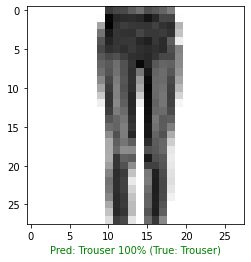

In [120]:
# Check out a random image and its prediction
plot_random_image(model=model_14, 
                  images=test_data_norm, 
                  true_labels=test_labels, 
                  classes=class_names)

## What patterns is our model learning? (mixing up similar items)

In [122]:
# Find the layers of our most recent model
model_14.layers

In [123]:
model_14.layers[1]

In [125]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Weights
weights, weights.shape

(array([[ 1.5936174 , -0.76976854, -1.5807068 , -1.9991511 ],
        [ 0.45609504, -1.2976133 , -0.7302893 , -0.16224061],
        [ 1.348038  , -0.19881976, -1.9888442 , -1.2137522 ],
        ...,
        [-0.22335076,  0.59402996, -0.272626  ,  0.4604269 ],
        [-0.21883878,  1.1971763 ,  0.5428994 , -0.5791032 ],
        [ 0.37653425, -0.19791599,  0.02285609,  0.24255323]],
       dtype=float32), (784, 4))

In [127]:
# Biases
biases, biases.shape

(array([ 0.3281791 , -0.01041772, -0.1584291 ,  1.2009073 ], dtype=float32),
 (4,))

In [128]:
model_14.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Every neuron has a bias vector. Each of these is paired with a weights matrix.
The bias vector gets initiatlized as 0s (for tensorflow dense layer at least)
The bias vector dictates how much the patters within the corresponding weights matrix should influence the next layer

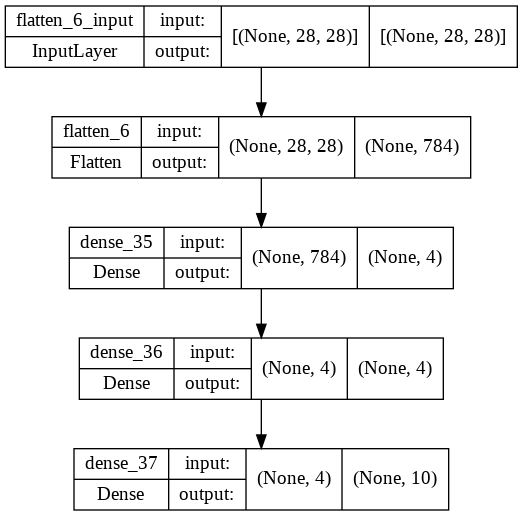

In [129]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the input and output of each layer
plot_model(model_14, show_shapes=True)